In [68]:
#Loading the Data

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
#Reading The CSV
data=pd.read_csv('crime.csv',engine='python')

Pre Processing The Data to Generate Decision Trees

In [74]:
data['SHOOTING']=data['SHOOTING'].fillna(0)
data['SHOOTING']=data['SHOOTING'].map({0: 0,'Y':1})

data.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                1774
REPORTING_AREA             0
SHOOTING                1055
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                  93
STREET                 10977
Lat                    20632
Long                   20632
Location                   0
dtype: int64

In [75]:
#Drop All Null Values
datanew= data.dropna()
datanew.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
REPORTING_AREA         0
SHOOTING               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

In [76]:
datanew['NightTime'] = 0


C:\Users\akrit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [77]:
datanew['NightTime'].loc[(datanew['HOUR'] >= 18)] = 1
datanew['NightTime'].loc[(datanew['HOUR'] <= 5)] = 1
datanew.head()

C:\Users\akrit\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\akrit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\akrit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,NightTime
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,0.0,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)",1
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,0.0,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)",1
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,0.0,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)",1
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,0.0,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)",1
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,0.0,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)",1


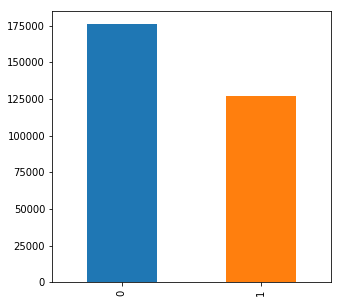

In [78]:
plt.figure(figsize=(5,5))
datanew['NightTime'].value_counts().plot.bar()
plt.show()

In [79]:
datanew['OFFENSE_CODE_GROUP'].value_counts().head(10)

#Analysing The Top Ten Offense Groups

Motor Vehicle Accident Response    31180
Larceny                            25808
Medical Assistance                 23021
Investigate Person                 18371
Other                              17494
Simple Assault                     15259
Vandalism                          15217
Drug Violation                     14800
Verbal Disputes                    13321
Towed                              11057
Name: OFFENSE_CODE_GROUP, dtype: int64

In [80]:
OFFENSE_CODE_GROUP_SELECTED = ('Motor Vehicle Accident Response','Larceny','Medical Assistance','Investigate Person','Other', 
            'Drug Violation','Other','Simple Assault','Vandalism','Verbal Disputes','Towed')

processedData = pd.DataFrame()
k = 0
while k<len(OFFENSE_CODE_GROUP_SELECTED):
    processedData = processedData.append(datanew.loc[datanew['OFFENSE_CODE_GROUP']==OFFENSE_CODE_GROUP_SELECTED[k]])
    k = k+1
processedData.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,NightTime
10,I182080043,3803,Motor Vehicle Accident Response,M/V ACCIDENT - PERSONAL INJURY,D14,750,0.0,2018-10-03 19:33:00,2018,10,Wednesday,19,Part Three,FOSTER ST,42.344323,-71.157784,"(42.34432328, -71.15778368)",1
20,I182080030,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,C6,234,0.0,2018-10-02 20:00:00,2018,10,Tuesday,20,Part Three,COLUMBIA RD,42.330015,-71.038513,"(42.33001489, -71.03851306)",1
68,I182079979,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,C11,255,0.0,2018-10-03 15:13:00,2018,10,Wednesday,15,Part Three,DORCHESTER AVE,42.310910,-71.057674,"(42.31091044, -71.05767414)",0
72,I182079974,3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,D14,773,0.0,2018-10-01 19:00:00,2018,10,Monday,19,Part Three,COLWELL AVE,42.342592,-71.155817,"(42.34259153, -71.15581674)",1
77,I182079969,3820,Motor Vehicle Accident Response,M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY,B2,613,0.0,2018-10-03 15:51:00,2018,10,Wednesday,15,Part Three,LONGWOOD AVE,42.339727,-71.108683,"(42.33972732, -71.10868260)",0


In [81]:
transform_labels=processedData.iloc[:,:]
transform_labels.loc[:,'STREET']=LabelEncoder().fit_transform(transform_labels.loc[:,'STREET'].astype('str'))
transform_labels.loc[:,'DISTRICT']=LabelEncoder().fit_transform(transform_labels.loc[:,'DISTRICT'].astype('str'))
transform_labels.loc[:,'REPORTING_AREA']=LabelEncoder().fit_transform(transform_labels.loc[:,'REPORTING_AREA'].astype('str'))
transform_labels.loc[:,'DAY_OF_WEEK']=LabelEncoder().fit_transform(transform_labels.loc[:,'DAY_OF_WEEK'])
transform_labels.loc[:,'STREET']=LabelEncoder().fit_transform(transform_labels.loc[:,'STREET'].astype('str'))
transform_labels.loc[:,'UCR_PART']=LabelEncoder().fit_transform(transform_labels.loc[:,'UCR_PART'].astype('str'))
transform_labels.loc[:,'OFFENSE_CODE_GROUP']=LabelEncoder().fit_transform(transform_labels.loc[:,'OFFENSE_CODE_GROUP'])
transform_labels.loc[:,'OFFENSE_DESCRIPTION']=LabelEncoder().fit_transform(transform_labels.loc[:,'OFFENSE_DESCRIPTION'])
transform_labels.loc[:,'DISTRICT']=LabelEncoder().fit_transform(transform_labels.loc[:,'DISTRICT'].astype('str'))
transform_labels.loc[:,'REPORTING_AREA']=LabelEncoder().fit_transform(transform_labels.loc[:,'REPORTING_AREA'].astype('str'))
transform_labels.loc[:,'SHOOTING']=LabelEncoder().fit_transform(transform_labels.loc[:,'SHOOTING'])
transform_labels.loc[:,'DAY_OF_WEEK']=LabelEncoder().fit_transform(transform_labels.loc[:,'DAY_OF_WEEK'])

transform_labels.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,NightTime
10,I182080043,3803,4,70,9,692,0,2018-10-03 19:33:00,2018,10,6,19,2,346,42.344323,-71.157784,"(42.34432328, -71.15778368)",1
20,I182080030,3831,4,64,8,59,0,2018-10-02 20:00:00,2018,10,5,20,2,3383,42.330015,-71.038513,"(42.33001489, -71.03851306)",1
68,I182079979,3831,4,64,7,84,0,2018-10-03 15:13:00,2018,10,6,15,2,9,42.310910,-71.057674,"(42.31091044, -71.05767414)",0
72,I182079974,3831,4,64,9,719,0,2018-10-01 19:00:00,2018,10,1,19,2,3389,42.342592,-71.155817,"(42.34259153, -71.15581674)",1
77,I182079969,3820,4,73,5,524,0,2018-10-03 15:51:00,2018,10,6,15,2,1156,42.339727,-71.108683,"(42.33972732, -71.10868260)",0


In [82]:
data=transform_labels.loc[:,['OFFENSE_CODE', 'OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 
                             'SHOOTING', 'YEAR','DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET']]
pca=PCA(n_components=11).fit(data)

In [83]:
from sklearn.model_selection import train_test_split
datanew= transform_labels.dropna()
train_data, test_data= train_test_split(datanew, random_state=0, test_size=0.05)

print(len(train_data))
print(len(test_data))

192870
10152


In [84]:
train_data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,NightTime
194571,I162086313,802,6,6,5,150,0,2016-10-21 15:12:00,2016,10,0,15,3,641,42.319337,-71.088852,"(42.31933723, -71.08885165)",0
296953,I152083409,3831,4,64,5,874,0,2015-10-07 16:49:00,2015,10,6,16,2,3352,42.323212,-71.070797,"(42.32321224, -71.07079676)",0
56810,I182019391,3006,3,79,0,543,0,2018-03-14 21:15:00,2018,3,6,21,2,1547,42.361839,-71.059765,"(42.36183857, -71.05976489)",1
58690,I182017405,3115,1,42,9,743,0,2018-03-07 05:36:00,2018,3,6,5,2,3394,42.349378,-71.132490,"(42.34937839, -71.13249037)",1
176002,I162106353,3102,5,43,11,149,0,2016-12-31 13:43:00,2016,12,2,13,2,2684,42.315237,-71.095965,"(42.31523737, -71.09596494)",0


# Predicting Month

In [85]:
from sklearn import tree

features_train = train_data[['DISTRICT','REPORTING_AREA','OFFENSE_CODE_GROUP','DAY_OF_WEEK','HOUR','Lat','Long']]
target_train = train_data[['MONTH']]
features_test = test_data[['DISTRICT','REPORTING_AREA','OFFENSE_CODE_GROUP','DAY_OF_WEEK','HOUR','Lat','Long']]
target_test = test_data[['MONTH']]

#Creating Our classifier By Providing Training Data
clf = tree.DecisionTreeClassifier()

clf = clf.fit(features_train, target_train)

In [86]:
#Predicting for the test set using the classifier created above
target_pred = clf.predict(features_test)
target_pred

array([5, 4, 7, ..., 6, 4, 6], dtype=int64)

In [88]:
from sklearn.metrics import classification_report
rep = classification_report(target_test, target_pred)
print(rep)

#Accurate Predictions with more Training Data

              precision    recall  f1-score   support

           1       0.28      0.28      0.28       747
           2       0.24      0.25      0.25       702
           3       0.26      0.27      0.26       744
           4       0.26      0.28      0.27       716
           5       0.25      0.25      0.25       797
           6       0.28      0.28      0.28       960
           7       0.28      0.27      0.28      1052
           8       0.31      0.31      0.31      1076
           9       0.29      0.28      0.29      1057
          10       0.26      0.26      0.26       819
          11       0.28      0.27      0.27       754
          12       0.25      0.24      0.24       728

   micro avg       0.27      0.27      0.27     10152
   macro avg       0.27      0.27      0.27     10152
weighted avg       0.27      0.27      0.27     10152



In [89]:
#1. The accuracy of your model on the test data

from sklearn.metrics import accuracy_score

accuracy_score(target_test, target_pred)

0.27206461780929864

# Predicting Month Using PCA and Gradient Boosting Classifier

In [93]:
pca=PCA(n_components=11).fit(data)
print(pca.explained_variance_ratio_)

[5.00991551e-01 4.72104212e-01 2.66569401e-02 2.24028916e-04
 1.49634959e-05 4.12207796e-06 1.96150280e-06 1.65903242e-06
 4.15305273e-07 1.47484569e-07 2.54526071e-39]


In [97]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

sampled_data=transform_labels.sample(n=10000)
pcad=sampled_data.loc[:,['OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
                         'OFFENSE_DESCRIPTION', 'DISTRICT', 
                         'REPORTING_AREA', 'SHOOTING', 
                         'YEAR','DAY_OF_WEEK', 'HOUR', 
                         'UCR_PART', 'STREET']]

pcadata = PCA(n_components=2).fit_transform(pcad)

target = sampled_data.loc[:,'MONTH']

x_train,x_test,y_train,y_test = train_test_split(pcadata,target,test_size=0.2)

gbc = GBC(max_depth=10).fit( x_train , y_train )

In [95]:
prediction=gbc.predict(x_test)
print(accuracy_score(y_test,prediction))

0.1015


# Predicting Month Using PCA and Random Forest Classifier

In [98]:
from sklearn.ensemble import RandomForestClassifier as RFC

rfc=RFC(max_depth=12)
rfc.fit(x_train,y_train)

C:\Users\akrit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [99]:
prediction=rfc.predict(x_test)
print(accuracy_score(y_test,prediction))

0.097


# ExtraTreeClassifier

In [100]:
#Creating Our classifier By Providing Training Data
clf2 = tree.ExtraTreeClassifier()

clf2 = clf2.fit(features_train, target_train)

In [101]:
#Predicting for the test set using the classifier created above
target_pred = clf2.predict(features_test)
target_pred

array([11,  1,  7, ...,  2,  4,  7], dtype=int64)

In [102]:
from sklearn.metrics import classification_report
rep = classification_report(target_test, target_pred)
print(rep)

#Accurate Predictions with more Training Data

              precision    recall  f1-score   support

           1       0.27      0.28      0.28       747
           2       0.25      0.26      0.26       702
           3       0.27      0.30      0.28       744
           4       0.25      0.27      0.26       716
           5       0.25      0.26      0.26       797
           6       0.29      0.29      0.29       960
           7       0.29      0.27      0.28      1052
           8       0.29      0.30      0.30      1076
           9       0.29      0.27      0.28      1057
          10       0.25      0.24      0.24       819
          11       0.28      0.26      0.27       754
          12       0.23      0.21      0.22       728

   micro avg       0.27      0.27      0.27     10152
   macro avg       0.27      0.27      0.27     10152
weighted avg       0.27      0.27      0.27     10152



In [103]:
#1. The accuracy of your model on the test data

from sklearn.metrics import accuracy_score

accuracy_score(target_test, target_pred)

0.2693065405831363

# KNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier

#Creating Our classifier By Providing Training Data
clf3 = KNeighborsClassifier()

clf3 = clf3.fit(features_train, target_train)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [35]:
#Predicting for the test set using the classifier created above
target_pred = clf2.predict(features_test)
target_pred

array([ 9,  7, 10, ...,  3,  9,  9])

In [36]:
from sklearn.metrics import classification_report
rep = classification_report(target_test, target_pred)
print(rep)

#Accurate Predictions with more Training Data

              precision    recall  f1-score   support

           1       0.28      0.28      0.28       728
           2       0.30      0.27      0.28       752
           3       0.26      0.27      0.27       767
           4       0.26      0.27      0.27       724
           5       0.26      0.27      0.27       826
           6       0.28      0.29      0.28       919
           7       0.28      0.28      0.28      1069
           8       0.31      0.31      0.31      1078
           9       0.31      0.30      0.30      1076
          10       0.25      0.25      0.25       793
          11       0.27      0.25      0.26       725
          12       0.25      0.25      0.25       700

   micro avg       0.28      0.28      0.28     10157
   macro avg       0.28      0.27      0.28     10157
weighted avg       0.28      0.28      0.28     10157



In [42]:
#1. The accuracy of your model on the test data

from sklearn.metrics import accuracy_score

accuracy_score(target_test, target_pred)

0.2712765957446808

# Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

#Creating Our classifier By Providing Training Data
clf4 = RandomForestClassifier()

clf4 = clf4.fit(features_train, target_train)

C:\Users\akrit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\akrit\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [48]:
#Predicting for the test set using the classifier created above
target_pred = clf4.predict(features_test)
target_pred

array([5, 3, 7, ..., 4, 1, 6], dtype=int64)

In [49]:
from sklearn.metrics import classification_report
rep = classification_report(target_test, target_pred)
print(rep)

#Accurate Predictions with more Training Data

              precision    recall  f1-score   support

           1       0.25      0.31      0.28       747
           2       0.23      0.27      0.25       702
           3       0.25      0.29      0.27       744
           4       0.27      0.29      0.28       716
           5       0.25      0.27      0.26       797
           6       0.27      0.29      0.28       960
           7       0.31      0.30      0.31      1052
           8       0.31      0.31      0.31      1076
           9       0.31      0.28      0.29      1057
          10       0.30      0.24      0.27       819
          11       0.34      0.25      0.29       754
          12       0.26      0.21      0.23       728

   micro avg       0.28      0.28      0.28     10152
   macro avg       0.28      0.28      0.28     10152
weighted avg       0.28      0.28      0.28     10152



In [104]:
#1. The accuracy of your model on the test data

from sklearn.metrics import accuracy_score

accuracy_score(target_test, target_pred)

0.2693065405831363

# Correlation Analysis using Pearson Coefficient

In [105]:
data=transform_labels.loc[:,['OFFENSE_CODE', 'OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION', \
                 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'YEAR','DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET','MONTH']]
pearsonMatrix=pd.DataFrame(round(data.corr(method='pearson'),3))
pearsonMatrix.sort_values(by='OFFENSE_CODE_GROUP',ascending=False)


,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,DAY_OF_WEEK,HOUR,UCR_PART,STREET,MONTH
OFFENSE_CODE_GROUP,0.114,1.000,0.483,0.007,-0.042,NaN,0.021,-0.012,-0.050,0.313,-0.025,-0.015
OFFENSE_DESCRIPTION,0.419,0.483,1.000,0.012,-0.021,NaN,0.015,-0.001,-0.038,-0.058,-0.014,-0.007
UCR_PART,0.027,0.313,-0.058,-0.035,-0.042,NaN,-0.017,0.005,-0.000,1.000,-0.031,-0.021
OFFENSE_CODE,1.000,0.114,0.419,-0.008,-0.029,NaN,0.032,-0.002,-0.035,0.027,-0.028,-0.007
YEAR,0.032,0.021,0.015,0.002,0.017,NaN,1.000,-0.001,0.001,-0.017,-0.000,-0.343
DISTRICT,-0.008,0.007,0.012,1.000,0.096,NaN,0.002,0.003,0.011,-0.035,-0.014,-0.003
DAY_OF_WEEK,-0.002,-0.012,-0.001,0.003,-0.005,NaN,-0.001,1.000,0.008,0.005,0.001,0.004
MONTH,-0.007,-0.015,-0.007,-0.003,0.003,NaN,-0.343,0.004,-0.000,-0.021,0.003,1.000
STREET,-0.028,-0.025,-0.014,-0.014,0.032,NaN,-0.000,0.001,0.005,-0.031,1.000,0.003
REPORTING_AREA,-0.029,-0.042,-0.021,0.096,1.000,NaN,0.017,-0.005,-0.016,-0.042,0.032,0.003


In [106]:
ofdata=sampled_data.loc[:,['YEAR','SHOOTING','UCR_PART']]
oftarget=sampled_data.loc[:,'OFFENSE_CODE_GROUP']

In [107]:
ofdata.head(10)

,YEAR,SHOOTING,UCR_PART
213309,2016,0,2
43522,2018,0,2
30176,2018,0,2
256644,2016,0,3
255595,2016,0,2
227785,2016,0,1
177586,2016,0,2
170203,2017,0,3
42251,2018,0,2
22539,2018,0,1


In [108]:
x_train,x_test, y_train,y_test = train_test_split(ofdata,oftarget,train_size=0.8)

C:\Users\akrit\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [109]:
clf=tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
prediction=clf.predict(x_test)
print(accuracy_score(y_test,prediction))

0.453


# Predicting Offense Code Group

Using PCA and GBC

In [136]:
ofdata=sample.loc[:,['OFFENSE_CODE', 'OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION', 
                 'DISTRICT', 'REPORTING_AREA', 'SHOOTING', 'YEAR','DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET','MONTH']]
oftarget=sample.loc[:,'OFFENSE_CODE_GROUP']

pcadata=PCA(n_components=2).fit_transform(ofdata)

In [167]:
x_train,x_test, y_train,y_test = train_test_split(pcadata,oftarget,train_size=0.8)
pcaGBC=GBC(max_depth=66).fit(x_train,y_train)

C:\Users\akrit\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [168]:
pred = pcaGBC.predict(x_test)

In [169]:
print(accuracy_score(y_test,pred))

0.88


In [170]:
# 2. The precision and recall values
# calculate Precision Value

from sklearn import metrics

metrics.precision_score(y_test, pred, average='micro')


0.88

In [171]:
# Calculate Recall Value
# recall = TP/(TP+FN)
metrics.recall_score(y_test, pred, average='micro')


0.88

In [172]:
#Calculate precision, recall and fscore

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test , pred,  average='micro')

(0.88, 0.88, 0.88, None)

In [173]:
from sklearn.metrics import f1_score
sample=transform_labels.sample(n=1000)
f1_score(y_test , pred, average='micro')
 

0.88

Using PCA and Decision Tree Classifier

In [176]:
clf=tree.DecisionTreeClassifier()
clf.fit(x_train,y_train)
prediction=clf.predict(x_test)
print(accuracy_score(y_test,prediction))

0.85


In [181]:
# 2. The precision and recall values
# calculate Precision Value

from sklearn import metrics

metrics.precision_score(y_test, prediction, average='micro')


0.85

In [182]:
# Calculate Recall Value
# recall = TP/(TP+FN)
metrics.recall_score(y_test, prediction, average='micro')


0.85

In [183]:
#Calculate precision, recall and fscore

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test , prediction,  average='micro')

(0.85, 0.85, 0.85, None)

In [184]:
from sklearn.metrics import f1_score
sample=transform_labels.sample(n=1000)
f1_score(y_test , prediction, average='micro')
 

0.85

Using PCA and KNN

In [185]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf = clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print(accuracy_score(y_test , pred))

0.89


In [186]:
# 2. The precision and recall values
# calculate Precision Value

from sklearn import metrics

metrics.precision_score(y_test, pred, average='micro')


0.89

In [187]:
# Calculate Recall Value
# recall = TP/(TP+FN)
metrics.recall_score(y_test, pred, average='micro')


0.89

In [188]:
#Calculate precision, recall and fscore

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test , pred,  average='micro')

(0.89, 0.89, 0.89, None)

In [189]:
from sklearn.metrics import f1_score
sample=transform_labels.sample(n=1000)
f1_score(y_test , pred, average='micro')
 

0.89

Using PCA and Random Forest Classifier

In [210]:
clf = RandomForestClassifier()
clf = clf.fit(x_train, y_train)
prediction=clf.predict(x_test)
print(accuracy_score(y_test,prediction))

0.905


C:\Users\akrit\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [211]:
# 2. The precision and recall values
# calculate Precision Value

from sklearn import metrics

metrics.precision_score(y_test, prediction, average='micro')


0.905

In [213]:
# Calculate Recall Value
# recall = TP/(TP+FN)
metrics.recall_score(y_test, prediction, average='micro')


0.905

In [214]:
#Calculate precision, recall and fscore

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test , prediction,  average='micro')

(0.905, 0.905, 0.905, None)

In [215]:
from sklearn.metrics import f1_score
sample=transform_labels.sample(n=1000)
f1_score(y_test , prediction, average='micro')
 

0.905

Earlier when were predicting the month using various classifiers and the results were not good.

After Performing Correlation Analysis using Pearson Coefficient, we used the features by PCA and predicted offence code groups.